NB to show how to read STScI's precompiled background estimates for the ETC.  Want to make my own bathtub curves of zody vs time.  
To read binary files, following tutorial at http://vislab-ccom.unh.edu/~schwehr/rt/python-binary-files.html

In [27]:
# File description from email V Laidler 23 March 2017
# C structure used to write the stray light binary file.
# One record per file.
#    typedef struct {
#              double pix_ra;
#              double pix_dec;
#              double pos[3];
#              double nonzodi_bg[SL_NWAVE];  // The in-field ism+cib for each pixel.
#            } sl_pix;
#              Then for every day with the target in the FOR,the following three items are written.
#              double day;
#              double zodi_bg[SL_NWAVE];  //  The combined in-field zodi for each pixel.
#              double stray_light_bg[SL_NWAVE];  //The equivalent in-field background from stray light from zodi, stellar,ism, cib
#The wavelength array is the standard one that we converged
#on last year, so they are all on the same wavelength array
#that is SL_NWAVE = 108 elements long.

In [2]:
import struct
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [79]:
thedir = "/Volumes/Apps_and_Docs/MISSIONS/JWST/Zody_bathtubs/"
wave_file = "updated_std_spectrum_wavelengths.txt"  # Standard wavelength array.  Should be SL_NWave=108 long
wave_array = np.loadtxt(thedir + wave_file)
myfile = "bg_samples_for_jane/sl_pix_099422.bin" #sl_pix_000593.bin" #
SL_NWAVE = 108  # size of wavelength array
sbet_file = open(thedir + myfile)
sbet_data = sbet_file.read()

In [104]:
print "File has", len(sbet_data), "bytes, which is", len(sbet_data)/8., "doubles"
allval = struct.unpack(str(len(sbet_data)/8) + 'd', sbet_data)
perday = 1 + SL_NWAVE*2  # size of a daily chunk
static = 5 + SL_NWAVE   # data for position, not time-variable
Ndays = (len(allval)*1.0 - static)/ perday
print "Warning, Ndays should be an integer. Is it?", Ndays
Ndays = int(Ndays)
print len(allval), "total doubles"
print " ", static, "values true for all dates, plus"
print " ", perday, "values per day for", Ndays, "days"
print perday*Ndays
print len(allval) - 5 - SL_NWAVE, "values that are per day"
print "Weird, I have", len(allval) - static - perday*int(Ndays), "extra values"
RAnew = allval[0]
DECnew = allval[1]
pos = allval[2:5]
nonzodi_bg = allval[5:5+SL_NWAVE]
day            = np.zeros(Ndays)
zodi_bg        = np.zeros((Ndays,SL_NWAVE))
stray_light_bg = np.zeros((Ndays,SL_NWAVE))
for dd in range(0, int(Ndays)):
    br1 = static + dd*perday
    br2 = br1 + 1
    br3 = br2 + SL_NWAVE
    br4 = br3 + SL_NWAVE
    print "Breaking at:", br1, br2, br3, br4
    day[dd]            = allval[br1]
    #print "DAY", day
    zodi_bg[dd, :]        = allval[br2 : br3]
    stray_light_bg[dd, :] = allval[br3 : br4]
print "DEBUG, last double was", br4
#print "DEBUGGING", zodi_bg
#print "DEBUGGING", stray_light_bg
#print "DEBUGGING", allval[SL_NWAVE +5 : SL_NWAVE+5+SL_NWAVE]
print "There are", len(allval[br4 : len(allval)]), "extra values at the end of the file:" 
print allval[br4 : len(allval)]
print zodi_bg[30, :]

File has 195904 bytes, which is 24488.0 doubles
Warning, Ndays should be an integer. Is it? 112.32718894
24488 total doubles
  113 values true for all dates, plus
  217 values per day for 112 days
24304
24375 values that are per day
Weird, I have 71 extra values
Breaking at: 113 114 222 330
Breaking at: 330 331 439 547
Breaking at: 547 548 656 764
Breaking at: 764 765 873 981
Breaking at: 981 982 1090 1198
Breaking at: 1198 1199 1307 1415
Breaking at: 1415 1416 1524 1632
Breaking at: 1632 1633 1741 1849
Breaking at: 1849 1850 1958 2066
Breaking at: 2066 2067 2175 2283
Breaking at: 2283 2284 2392 2500
Breaking at: 2500 2501 2609 2717
Breaking at: 2717 2718 2826 2934
Breaking at: 2934 2935 3043 3151
Breaking at: 3151 3152 3260 3368
Breaking at: 3368 3369 3477 3585
Breaking at: 3585 3586 3694 3802
Breaking at: 3802 3803 3911 4019
Breaking at: 4019 4020 4128 4236
Breaking at: 4236 4237 4345 4453
Breaking at: 4453 4454 4562 4670
Breaking at: 4670 4671 4779 4887
Breaking at: 4887 4888 4996 5

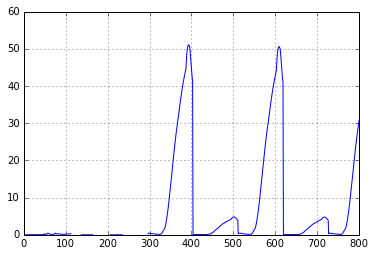

In [107]:
#plt.plot(wave_array, nonzodi_bg, label="ISM")
#plt.plot(wave_array, zodi_bg[24], label="Zodi")
#plt.plot(wave_array, stray_light_bg[0, :], label="Stray light")
plt.plot(allval)
plt.xlim(0,800)
plt.ylim(0,60)
plt.grid()
plt.legend()